<a href="https://colab.research.google.com/github/helakhaddar/Graduation_project/blob/main/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data cleaning and preprocessing of the final dataset:
1- Preparation

2- Cleaning the text

3- analyzing the text length

4- Worldcloud

5- saving the cleaned dataset

6- Preprocessing the dataset for fine tuning with bert

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
directory_path ="/content/drive/MyDrive/PFE/Data/"

## Importing librairies

In [ ]:
!pip install emoji
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.6 MB/s eta 0:00:00


In [ ]:
import os
# Libraries for general purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Text cleaning
import re
import string
import emoji
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud



## Loading the dataset and doing some cleaning:
- Removing some columns
- changing the labels into sth the model will understand (not strings)


In [ ]:
data = pd.read_csv(directory_path + "Data_with_Sentiment.csv")
data.head()

,Text,label,Sentiment
0,@halalflaws @biebervalue @greenlinerzjm I read...,Non-cyberbullying,neutral
1,@ShreyaBafna3 Now you idiots claim that people...,Non-cyberbullying,negative
2,"RT @Mooseoftorment Call me sexist, but when I ...",Bullying,neutral
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",Bullying,negative
4,#mkr No No No No No No,Non-cyberbullying,neutral


In [ ]:
data.shape

(64639, 3)

In [ ]:
data['label'].replace({'Bullying': 1, 'Non-cyberbullying': 0}, inplace=True)

In [ ]:
data['Sentiment'].replace({'positive': 1, 'negative': -1, 'neutral': 0}, inplace=True)

In [ ]:
data.head()

,Text,label,Sentiment
0,@halalflaws @biebervalue @greenlinerzjm I read...,0,0
1,@ShreyaBafna3 Now you idiots claim that people...,0,-1
2,"RT @Mooseoftorment Call me sexist, but when I ...",1,0
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1,-1
4,#mkr No No No No No No,0,0


In [ ]:
data['label'].value_counts()

label
1    43611
0    21028
Name: count, dtype: int64

In [ ]:
data['Sentiment'].value_counts()

Sentiment
 1    24519
-1    24347
 0    15773
Name: count, dtype: int64

There is some imbalance

## Cleaning Text:
*   Removing URLS
*   Removing hashtags and mentions
*   Removing special caracters, punctuation and numbers
* Removing retweet

* Stopword removal

* Lemmatization: Doing the lemmatization instead of the stemming, because we need the context





In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Lemmatize words
def lemmatize(text):
    words = word_tokenize(text)
    lemmatized_words = [wordnet_lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Remove short words
def remove_short_words(text, min_len=2):
    words = text.split()
    long_words = [word for word in words if len(word) >= min_len]
    return ' '.join(long_words)

# Remove extra whitespace
def remove_extra_whitespace(text):
    return ' '.join(text.split())

# Remove spaces at the beginning and end of the tweet
def remove_spaces_tweets(tweet):
    return tweet.strip()

# Remove short tweets
def remove_short_tweets(tweet, min_words=3):
    words = tweet.split()
    return tweet if len(words) >= min_words else ""


In [ ]:
def clean_text(text):
    #clean emojis from text
    text = emoji.replace_emoji(text, replace="")

    # Expand contractions
    text = contractions.fix(text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove user mentions and hashtags
    text = re.sub(r'\@\w+|\#', '', text)

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Remove 'RT' (Retweet) indicator
    text = re.sub(r'\bRT\b', '', text)

    # Replace newline and carriage return with space, and convert to lowercase
    text = re.sub(r'\r|\n', ' ', text.lower())

    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7f]', '', text)

    #stopword removal
    text = ' '.join(word for word in text.split() if word not in stop_words)

    # Remove multiple spaces
    text = re.sub(r"\s\s+", " ", text)

    #lemmatization
    text= lemmatize(text)

    text= remove_short_tweets(text)

    return text

In [ ]:
data['cleaned_text'] = data['Text'].apply(clean_text)

In [ ]:
data.head(20)

,Text,label,Sentiment,cleaned_text
0,@halalflaws @biebervalue @greenlinerzjm I read...,0,0,read contextno change meaning history islamic ...
1,@ShreyaBafna3 Now you idiots claim that people...,0,-1,idiot claim people tried stop becoming terrori...
2,"RT @Mooseoftorment Call me sexist, but when I ...",1,0,call sexist go auto place would rather talk guy
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1,-1,wrong isi follows example mohammed quran exactly
4,#mkr No No No No No No,0,0,
5,RT @TRobinsonNewEra: http://t.co/nkkCbpcHEo Sa...,0,0,saudi preacher raped tortured five yearold dau...
6,RT @Millhouse66 @Maureen_JS nooo not sexist bu...,1,-1,nooo sexist woman bad driver
7,Going to make some pancakes.....Don't hve any ...,0,1,going make pancakesdo hve strawberry hve banan...
8,RT @ahtweet: @freebsdgirl How dare you have fe...,0,1,dare feeling fantastic way dehumanize someone
9,RT @Newmanzaa: There's something wrong when a ...,1,-1,something wrong girl win wayne rooney street s...


In [ ]:
print(data["Text"][9])
print("cleaned:", data["cleaned_text"][9])

RT @Newmanzaa: There's something wrong when a girl wins Wayne Rooney street striker #NotSexist
cleaned: something wrong girl win wayne rooney street striker notsexist


In [ ]:
print(f'There are around {int(data["cleaned_text"].duplicated().sum())} duplicated tweets, we will remove them.')

There are around 8874 duplicated tweets, we will remove them.


In [ ]:
data.drop_duplicates("cleaned_text", inplace=True)

In [ ]:
print(f'There are around {int(data["cleaned_text"].isnull().sum())} null tweets.')

There are around 0 null tweets.


In [ ]:
data.Sentiment.value_counts()

Sentiment
-1    22477
 1    21930
 0    11358
Name: count, dtype: int64

### Analyzing the lenghth of the texts

In [ ]:
data['text_len'] = [len(text.split()) for text in data.cleaned_text]

In [ ]:
data.sort_values(by=['text_len'], ascending=False)

,Text,Label,sentiment,cleaned_text,text_len
18851,"""Henry Cisneros - Democrat - U.S. Secretary of...",0.0,-1,henry cisneros democrat yous secretary housing...,1375
23423,"""The real reason comments sections are limited...",0.0,1,real reason comment section limitedxa theracec...,1018
20257,"""Great Scott\\nStephen F. Hayes\\nFebruary 20,...",0.0,-1,great scottnstephen f hayesnfebruary vol nnthr...,881
23643,"""Christi... I hope somehow you do see this com...",0.0,1,christi hope somehow see comment completely ta...,532
18153,"""Don't forget toe-tappin' Larry Craig, Randall...",0.0,1,forget toetappin larry craig randall duke cunn...,495
...,...,...,...,...,...
41861,"What is the SJW version of ""SUCH SA…",1.0,1,sjw version sa,3
41825,@lawrenceantnhoy @OGSaxx Youre an idiot cause ...,1.0,-1,idiot care talking,3
19745,"""you are an ignorant piece of sh#t.""",1.0,-1,ignorant piece sht,3
44824,#oomf keeps bullying me :(,1.0,-1,oomf keep bullying,3


In [ ]:
data = data[data['text_len'] < data['text_len'].quantile(0.995)]

It returns the value below which 99.5% of the data in the text_len column falls

In [ ]:
data.sort_values(by=['text_len'], ascending=False)

,Text,Label,sentiment,cleaned_text,text_len
17601,"""I really like "" When you combine tactics such...",0.0,1,really like combine tactic integrated marketin...,63
19717,"""A few Thunder fans here don't seem to want to...",0.0,-1,thunder fan seem want acknowledge lost game nn...,63
23879,"""Robin, I NEVER, NEVER do this, but I feel com...",0.0,1,robin never never feel compelled today heard n...,63
24753,"""Gabby in Florida ********* ""Liberals want Ob...",0.0,1,gabby florida liberal want obama king presiden...,63
24283,"""this is wat u call a skank ass trick ass jump...",1.0,-1,wat call skank as trick as jumpskizie aitn shi...,63
...,...,...,...,...,...
8258,@coopatropp np. Will be home soon.,0.0,1,np home soon,3
26180,Your radio gets bullied,0.0,-1,radio get bullied,3
26181,Reading about crack #wow,0.0,1,reading crack wow,3
15451,@freebsdglrI awww. someone's mad. &lt;3,0.0,-1,someone mad lt,3


## Generate wordcloud:

In [ ]:
# Separate texts based on class labels
bullying_texts = data[data['Label'] == 1]['cleaned_text']
non_bullying_texts = data[data['Label'] == 0]['cleaned_text']

In [ ]:
# Combine texts for each class
bullying_text = ' '.join(bullying_texts)
non_bullying_text = ' '.join(non_bullying_texts)

In [ ]:
# Function to generate word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=10)
    plt.axis('off')
    plt.show()

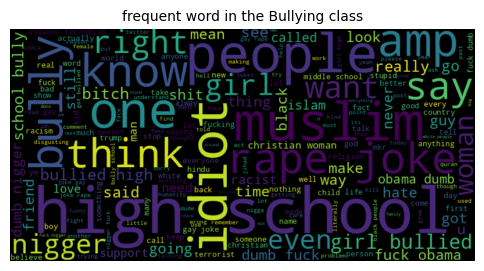

In [ ]:
# Generate word cloud for bullying
generate_word_cloud(bullying_text, 'frequent word in the Bullying class')

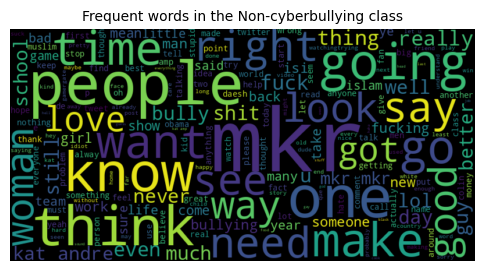

In [ ]:
# Generate word cloud for non-cyberbullying
generate_word_cloud(non_bullying_text, 'Frequent words in the Non-cyberbullying class')

In [ ]:
data.to_csv(os.path.join('/content/drive/MyDrive/PFE/Data', 'cleaned_data_sentiment.csv'), index=False)